# **Analysis of the Payroll Based Journal (PBJ) Daily Nurse Staffing**

### by *Nathaniel Cekay*

### Performed with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

This is an analysis of the Payroll Based Journal (PBJ) Daily Nurse Staffing, a dataset with information on all the registered nursing homes in the United States. Here is a detailed explanation of the columns:

PROVNUM: Provider Number A unique identifier assigned to each healthcare provider or facility, often used for tracking purposes in healthcare databases.

PROVNAME: Provider Name The name of the healthcare provider or facility associated with the given provider number.

CITY: City The city where the healthcare provider or facility is located.

STATE: State The U.S. state or territory where the provider is based, usually represented by the state's two-letter abbreviation.

COUNTY_NAME: County Name The name of the county where the healthcare provider is located.

COUNTY_FIPS: County FIPS Code A unique 5-digit code assigned to each U.S. county by the Federal Information Processing Standards (FIPS), used for geographic identification.

CY_Qtr: Calendar Year Quarter Indicates the quarter of the calendar year (e.g., Q1, Q2, Q3, Q4) for which the data is recorded.

WorkDate: Work Date The date associated with the recorded working hours, likely corresponding to a specific reporting period or date of service.

MDScensus: Minimum Data Set Census The number of patients or residents being served or counted at the time of data collection, particularly in healthcare settings.

Hrs_RNDON: Hours Registered Nurse Director of Nursing The total number of hours worked by the Director of Nursing who holds a registered nurse (RN) license.

Hrs_LPN_ctr: Hours Licensed Practical Nurse Contract The number of hours worked by licensed practical nurses (LPNs) who are hired on a contract basis, rather than as direct employees.

Hrs_CNA: Hours Certified Nursing Assistant (Employee) The total number of hours worked by Certified Nursing Assistants (CNAs) who are direct employees of the facility.

Hrs_CNA_emp: Hours CNA Employee Similar to Hrs_CNA, specifically capturing hours worked by CNAs employed directly by the facility (may indicate a specific subset of data).

Hrs_CNA_ctr: Hours CNA Contract The total number of hours worked by CNAs who are hired on a contract basis.

Hrs_NAtrn: Hours Nursing Aide in Training The number of hours worked by nursing aides who are still in training.

Hrs_NAtrn_emp: Hours Nursing Aide in Training Employee The number of hours worked by nursing aides in training who are employed by the facility (i.e., not contracted workers).

Hrs_NAtrn_ctr: Hours Nursing Aide in Training Contract The number of hours worked by nursing aides in training who are hired through a contract.

Hrs_MedAide: Hours Medical Aide The number of hours worked by medical aides, who assist with administering medications.

Hrs_MedAide_emp: Hours Medical Aide Employee The number of hours worked by medical aides who are direct employees of the facility.

Hrs_MedAide_ctr: Hours Medical Aide Contract The number of hours worked by medical aides who are contracted workers, not direct employees.

In [2]:
#Encoding added to load file
df = pd.read_csv("PBJ_Daily_Nurse_Staffing_Q1_2024.csv", encoding="cp1252")
print(df.head())

  ï»¿PROVNUM                  PROVNAME          CITY STATE COUNTY_NAME  \
0      15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
1      15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
2      15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
3      15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
4      15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   

   COUNTY_FIPS  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  ...  Hrs_LPN_ctr  \
0           59  2024Q1  20240101         50        8.0  ...          0.0   
1           59  2024Q1  20240102         49        8.0  ...          0.0   
2           59  2024Q1  20240103         49        8.0  ...          0.0   
3           59  2024Q1  20240104         50        8.0  ...          0.0   
4           59  2024Q1  20240105         51        8.0  ...          0.0   

   Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  Hrs_NAtrn  Hrs_NAtrn_emp  Hrs_NAtrn_ctr  \
0   156.34       

In [3]:
#Removing extra characters from column names
df.columns = df.columns.str.replace('ï»¿', '')

In [4]:
#Changing date column to date datatype
df['WorkDate'] = pd.to_datetime(df['WorkDate']).dt.date

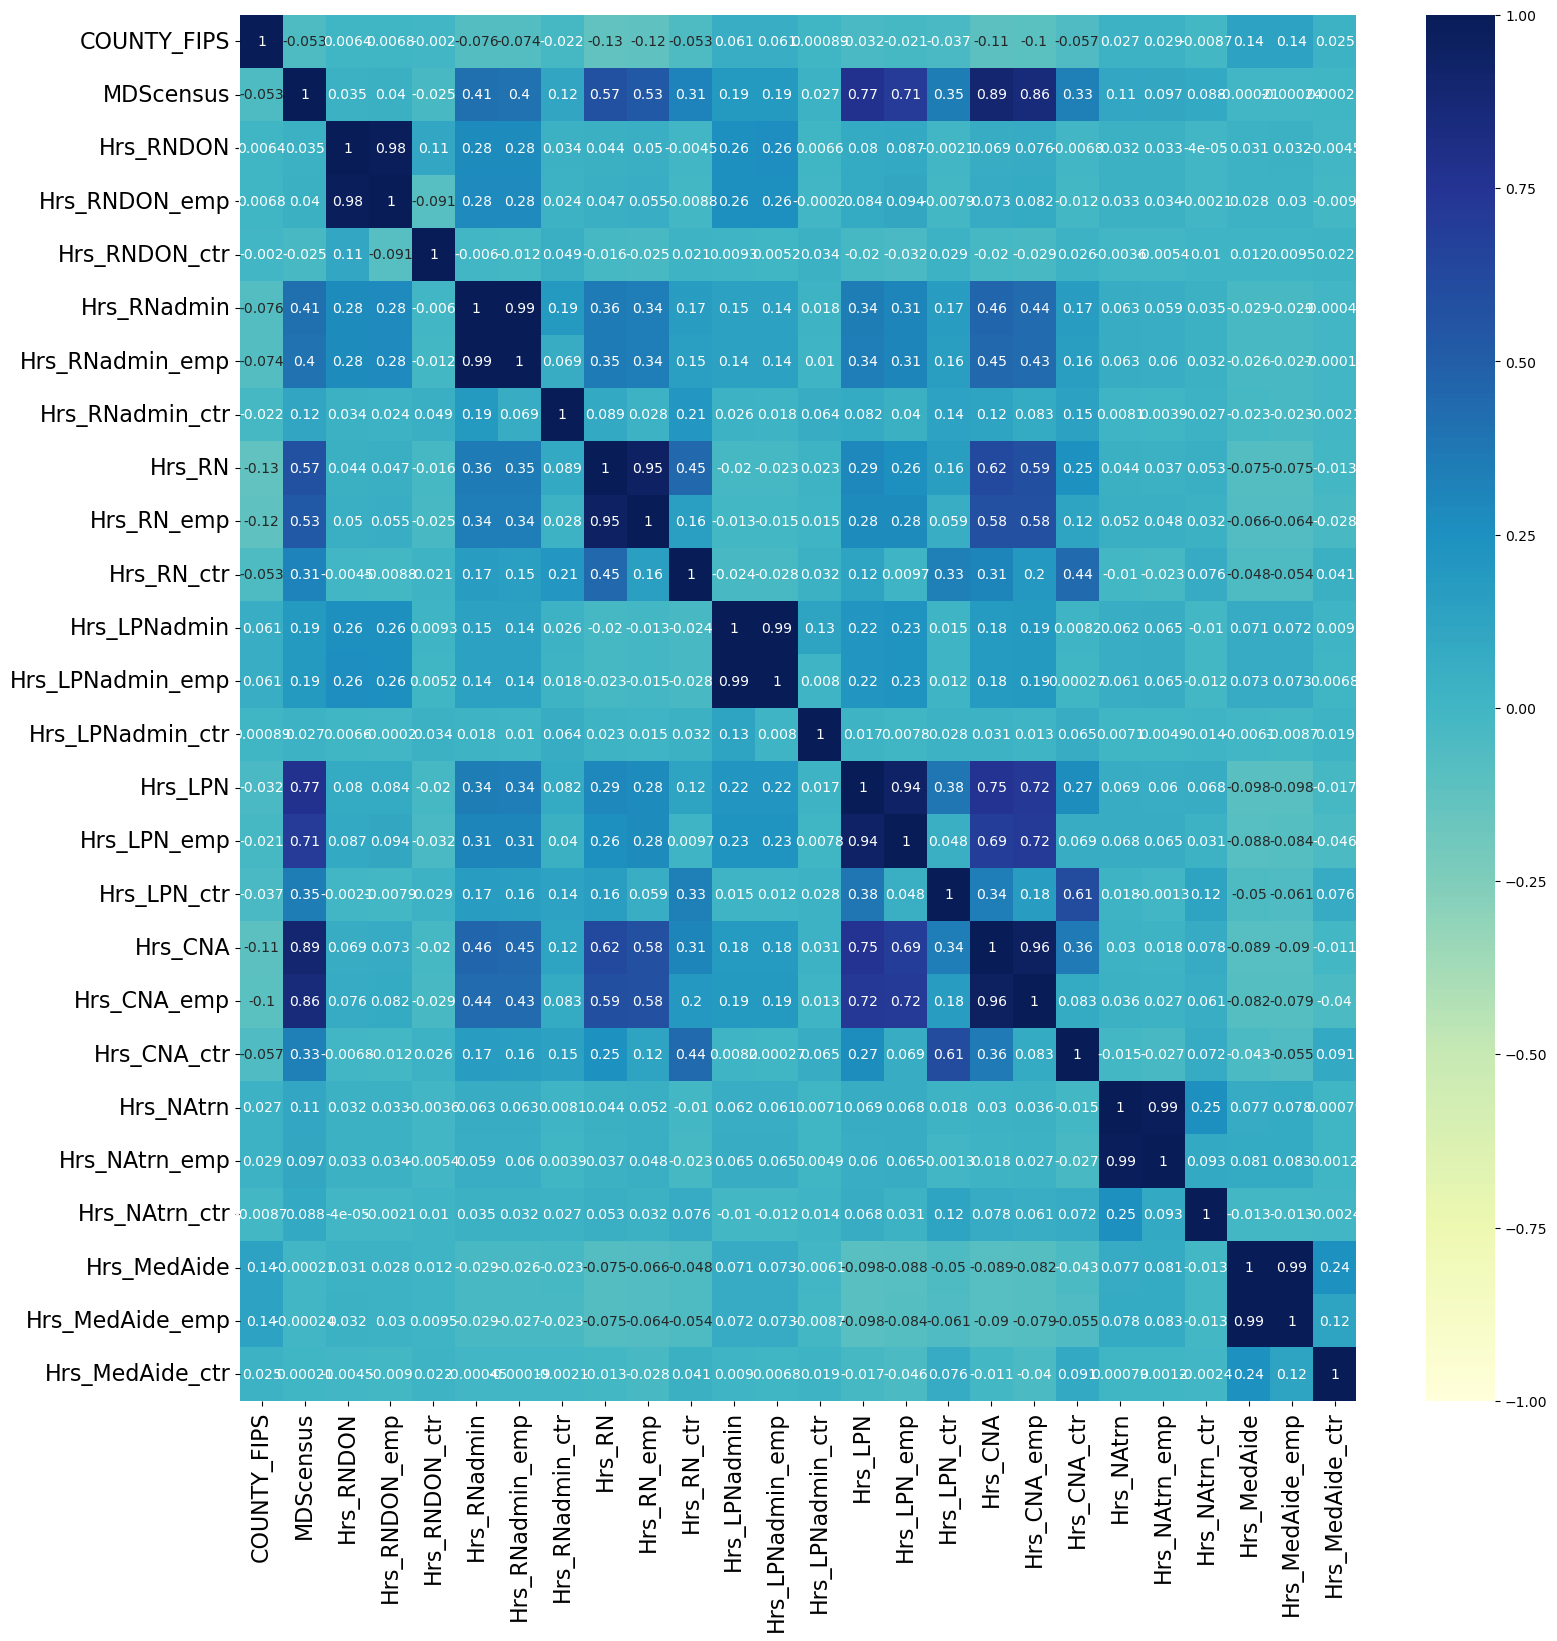

In [5]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, 
            annot_kws={"size": 10})  # Adjust annotation text size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

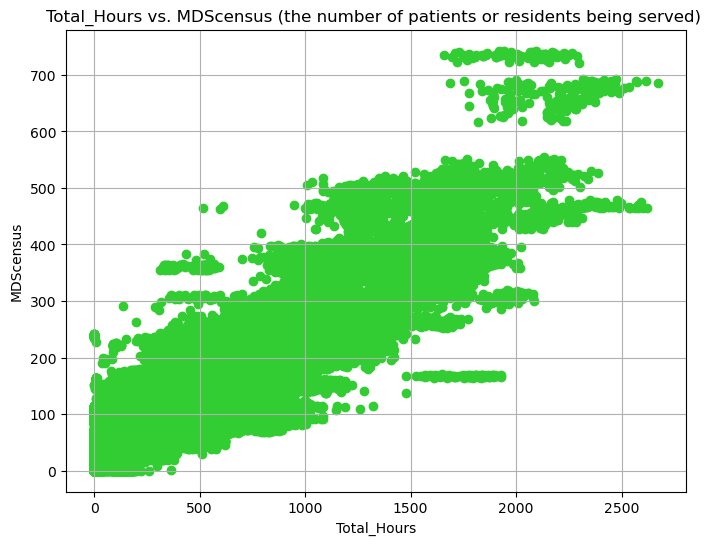

In [6]:
df['Total_Hours'] = df['Hrs_RNDON'] + df['Hrs_RNadmin'] + df['Hrs_RN'] + df['Hrs_CNA'] + df['Hrs_LPN'] + df['Hrs_NAtrn'] + df['Hrs_MedAide']

plt.figure(figsize=(8, 6))
plt.scatter(df['Total_Hours'], df['MDScensus'], color='limegreen')
plt.xlabel('Total_Hours')
plt.ylabel('MDScensus')
plt.title('Total_Hours vs. MDScensus (the number of patients or residents being served) ')
plt.grid(True)
plt.show()


In [7]:
# Defining the 5 regions
northeast_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']

southeast_states = ['DE', 'DC', 'MD', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL',
                     'AL', 'MS', 'AR', 'LA']

midwest_states = ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO',
                    'ND', 'SD', 'NE', 'KS']

west_states = ['CA', 'OR', 'WA', 'AK', 'HI', 'ID', 'NV', 'MT', 'WY', 'CO', 'UT',
                 'AZ', 'NM']

southwest_states = ['TX', 'OK']

df_northeast = df[df['STATE'].isin(northeast_states)]
df_southeast = df[df['STATE'].isin(southeast_states)]
df_midwest = df[df['STATE'].isin(midwest_states)]
df_west = df[df['STATE'].isin(west_states)]
df_southwest = df[df['STATE'].isin(southwest_states)]

print(f"Northeast DataFrame shape: {df_northeast.shape}")
print(f"Southeast DataFrame shape: {df_southeast.shape}")
print(f"Midwest DataFrame shape: {df_midwest.shape}")
print(f"West DataFrame shape: {df_west.shape}")
print(f"Southwest DataFrame shape: {df_southwest.shape}")

Northeast DataFrame shape: (219310, 34)
Southeast DataFrame shape: (345436, 34)
Midwest DataFrame shape: (429065, 34)
West DataFrame shape: (205660, 34)
Southwest DataFrame shape: (131040, 34)


In [8]:
# Creating a column for Total_Hours for each region
df_northeast['Total_Hours'] = df_northeast['Hrs_RNDON'] + df_northeast['Hrs_CNA'] + df_northeast['Hrs_LPN'] + df_northeast['Hrs_NAtrn'] + df_northeast['Hrs_MedAide']
df_southeast['Total_Hours'] = df_southeast['Hrs_RNDON'] + df_southeast['Hrs_CNA'] + df_southeast['Hrs_LPN'] + df_southeast['Hrs_NAtrn'] + df_southeast['Hrs_MedAide']
df_midwest['Total_Hours'] = df_midwest['Hrs_RNDON'] + df_midwest['Hrs_CNA'] + df_midwest['Hrs_LPN'] + df_midwest['Hrs_NAtrn'] + df_midwest['Hrs_MedAide']
df_west['Total_Hours'] = df_west['Hrs_RNDON'] + df_west['Hrs_CNA'] + df_west['Hrs_LPN'] + df_west['Hrs_NAtrn'] + df_west['Hrs_MedAide']
df_southwest['Total_Hours'] = df_southwest['Hrs_RNDON'] + df_southwest['Hrs_CNA'] + df_southwest['Hrs_LPN'] + df_southwest['Hrs_NAtrn'] + df_southwest['Hrs_MedAide']


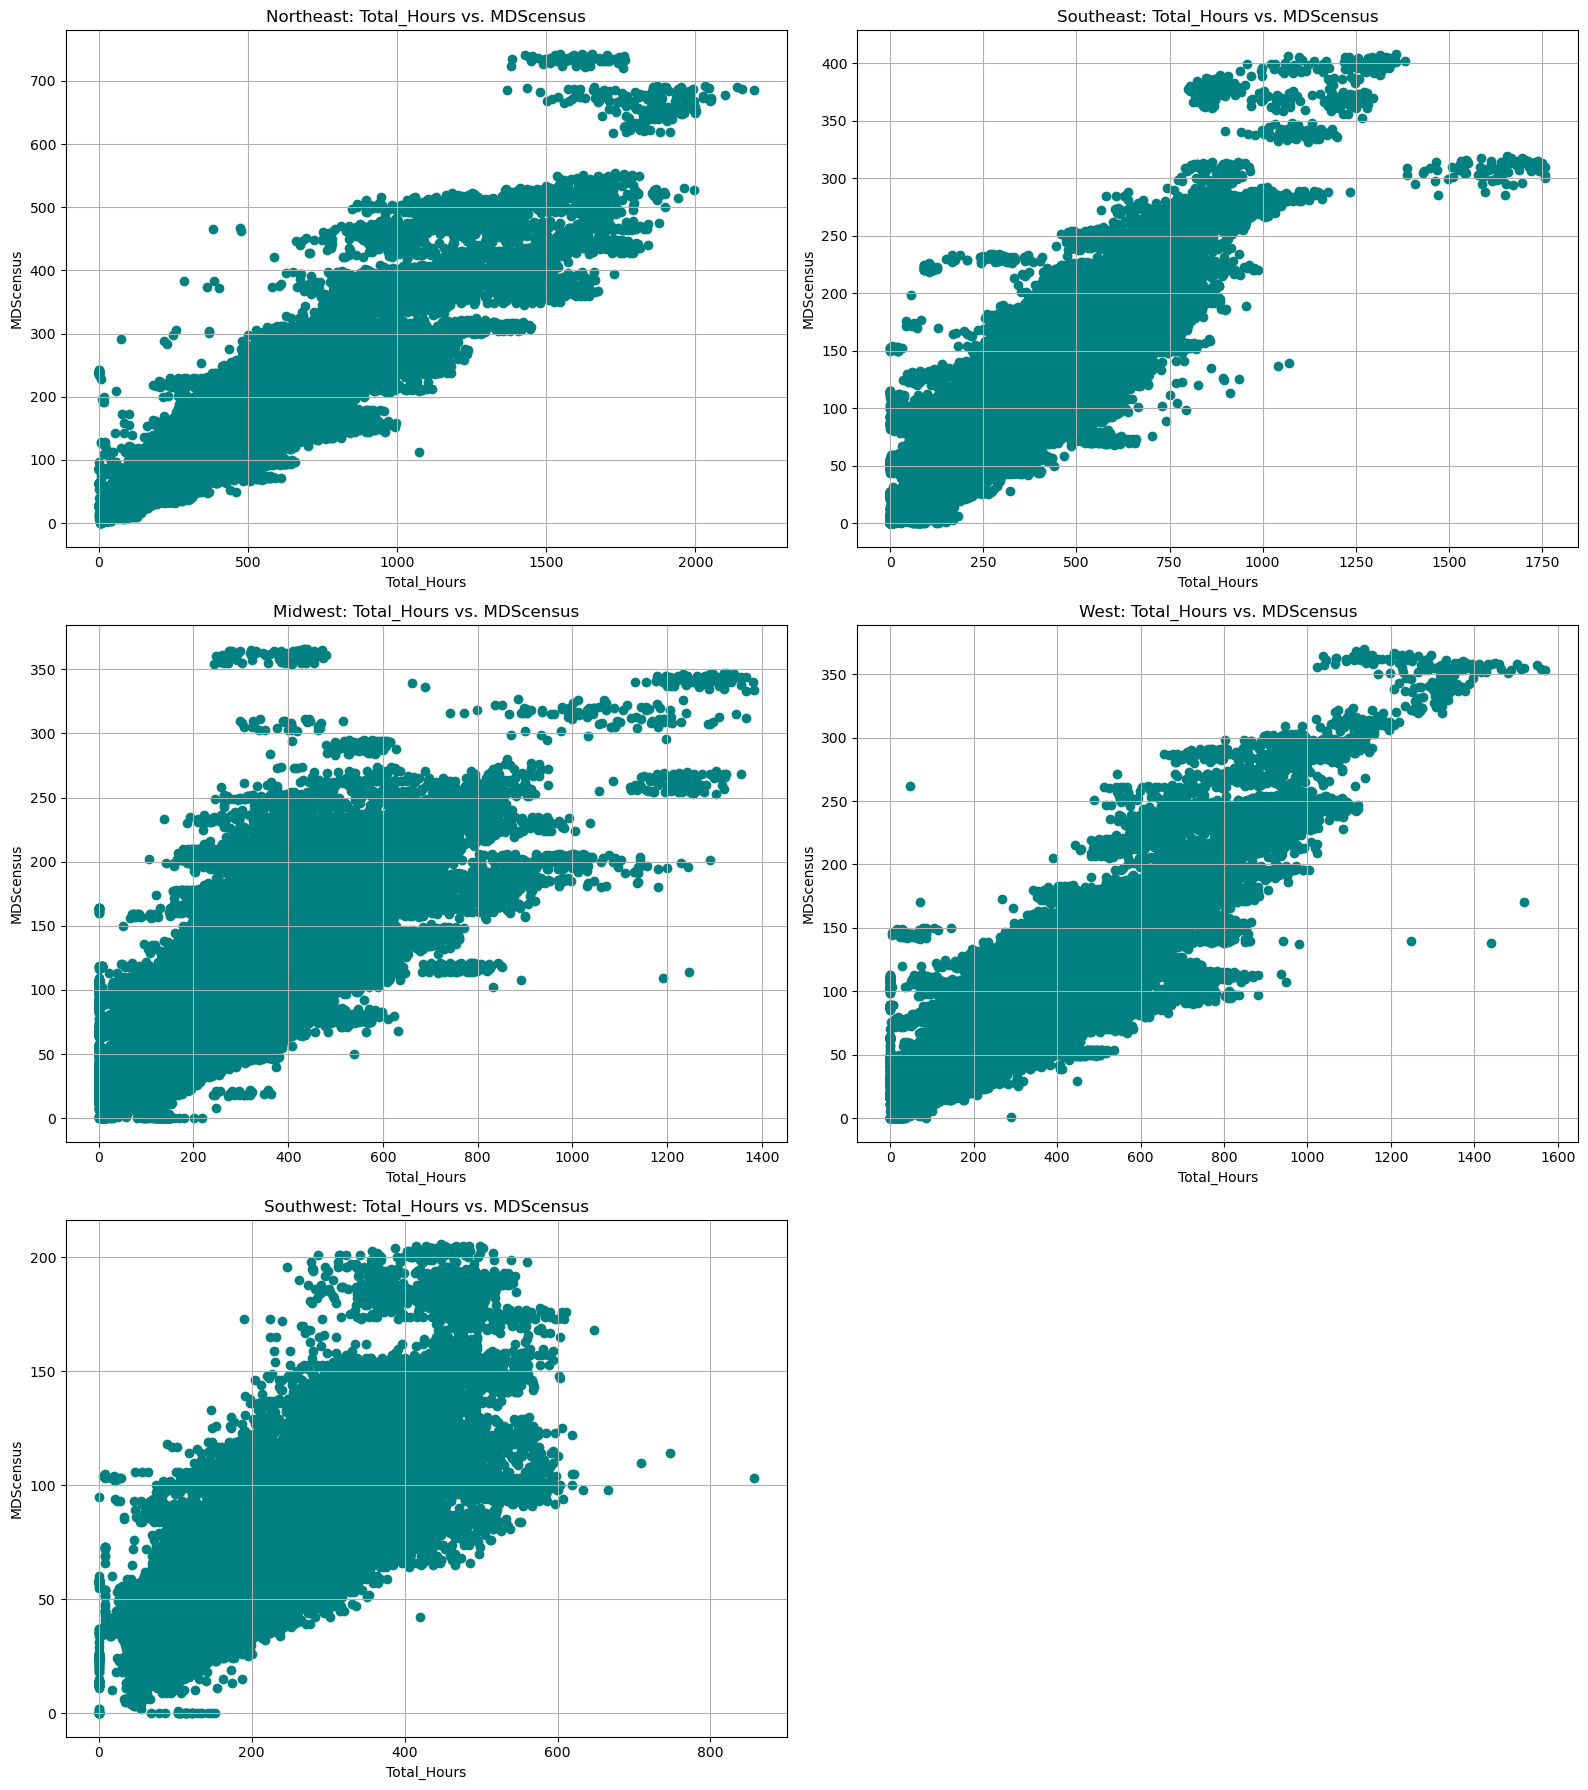

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

axs[0, 0].scatter(df_northeast['Total_Hours'], df_northeast['MDScensus'], color='teal')
axs[0, 0].set_title('Northeast: Total_Hours vs. MDScensus')
axs[0, 0].set_xlabel('Total_Hours')
axs[0, 0].set_ylabel('MDScensus')
axs[0, 0].grid(True)

axs[0, 1].scatter(df_southeast['Total_Hours'], df_southeast['MDScensus'], color='teal')
axs[0, 1].set_title('Southeast: Total_Hours vs. MDScensus')
axs[0, 1].set_xlabel('Total_Hours')
axs[0, 1].set_ylabel('MDScensus')
axs[0, 1].grid(True)

axs[1, 0].scatter(df_midwest['Total_Hours'], df_midwest['MDScensus'], color='teal')
axs[1, 0].set_title('Midwest: Total_Hours vs. MDScensus')
axs[1, 0].set_xlabel('Total_Hours')
axs[1, 0].set_ylabel('MDScensus')
axs[1, 0].grid(True)

axs[1, 1].scatter(df_west['Total_Hours'], df_west['MDScensus'], color='teal')
axs[1, 1].set_title('West: Total_Hours vs. MDScensus')
axs[1, 1].set_xlabel('Total_Hours')
axs[1, 1].set_ylabel('MDScensus')
axs[1, 1].grid(True)

axs[2, 0].scatter(df_southwest['Total_Hours'], df_southwest['MDScensus'], color='teal')
axs[2, 0].set_title('Southwest: Total_Hours vs. MDScensus')
axs[2, 0].set_xlabel('Total_Hours')
axs[2, 0].set_ylabel('MDScensus')
axs[2, 0].grid(True)

axs[2, 1].axis('off')  

plt.tight_layout()

plt.show()

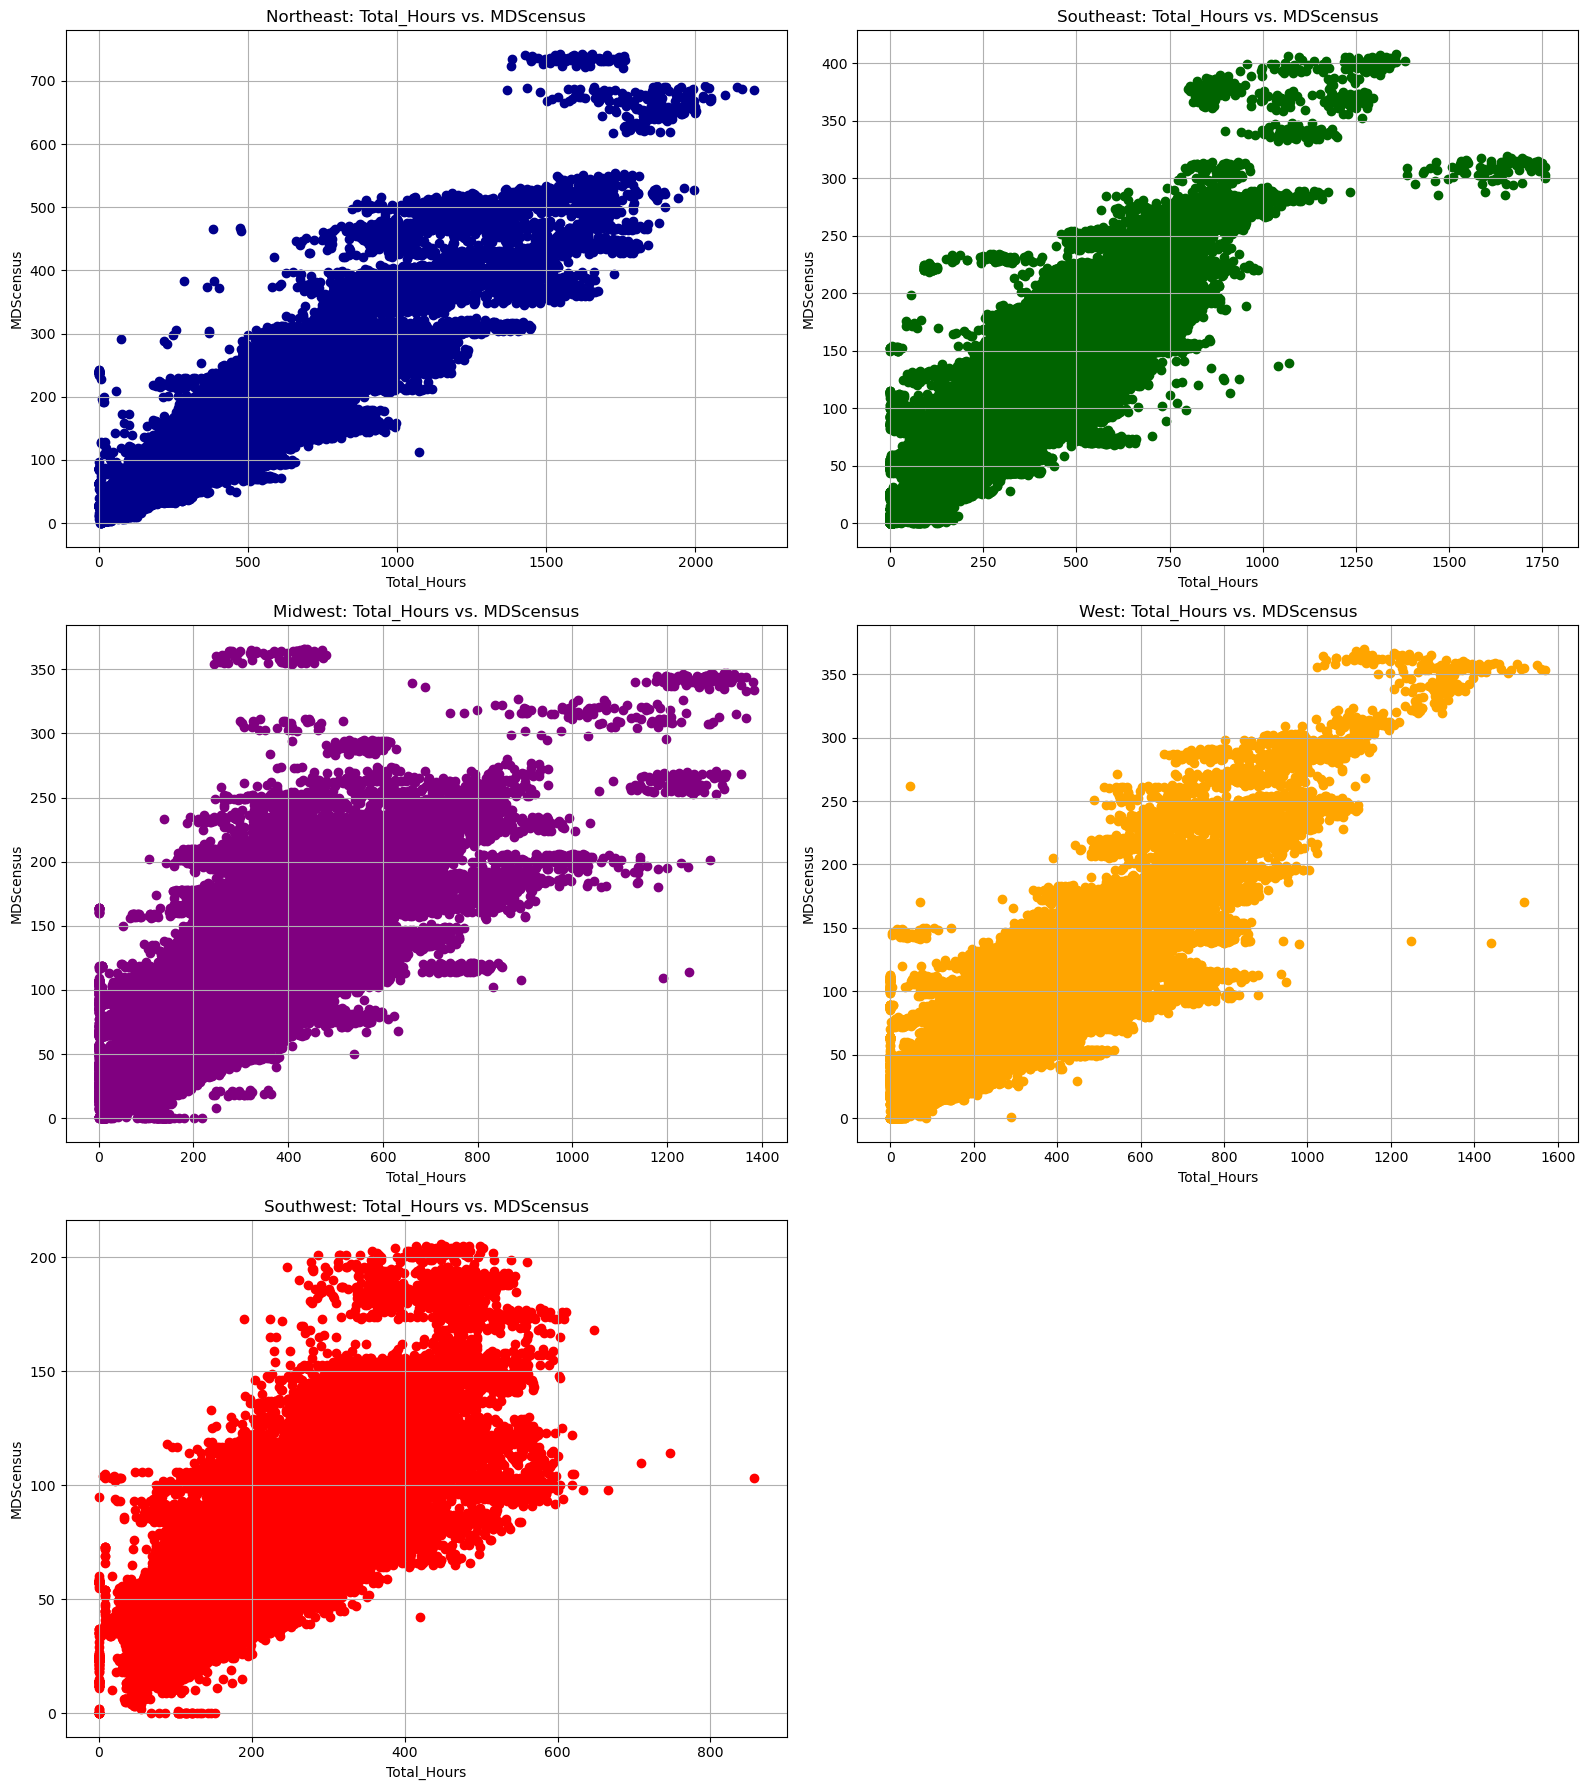

In [10]:
#Making different looking plots
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

axs[0, 0].scatter(df_northeast['Total_Hours'], df_northeast['MDScensus'], color='darkblue')
axs[0, 0].set_title('Northeast: Total_Hours vs. MDScensus')
axs[0, 0].set_xlabel('Total_Hours')
axs[0, 0].set_ylabel('MDScensus')
axs[0, 0].grid(True)


axs[0, 1].scatter(df_southeast['Total_Hours'], df_southeast['MDScensus'], color='darkgreen')
axs[0, 1].set_title('Southeast: Total_Hours vs. MDScensus')
axs[0, 1].set_xlabel('Total_Hours')
axs[0, 1].set_ylabel('MDScensus')
axs[0, 1].grid(True)

axs[1, 0].scatter(df_midwest['Total_Hours'], df_midwest['MDScensus'], color='purple')
axs[1, 0].set_title('Midwest: Total_Hours vs. MDScensus')
axs[1, 0].set_xlabel('Total_Hours')
axs[1, 0].set_ylabel('MDScensus')
axs[1, 0].grid(True)

axs[1, 1].scatter(df_west['Total_Hours'], df_west['MDScensus'], color='orange')
axs[1, 1].set_title('West: Total_Hours vs. MDScensus')
axs[1, 1].set_xlabel('Total_Hours')
axs[1, 1].set_ylabel('MDScensus')
axs[1, 1].grid(True)

axs[2, 0].scatter(df_southwest['Total_Hours'], df_southwest['MDScensus'], color='red')
axs[2, 0].set_title('Southwest: Total_Hours vs. MDScensus')
axs[2, 0].set_xlabel('Total_Hours')
axs[2, 0].set_ylabel('MDScensus')
axs[2, 0].grid(True)

axs[2, 1].axis('off')

plt.tight_layout()

plt.show()

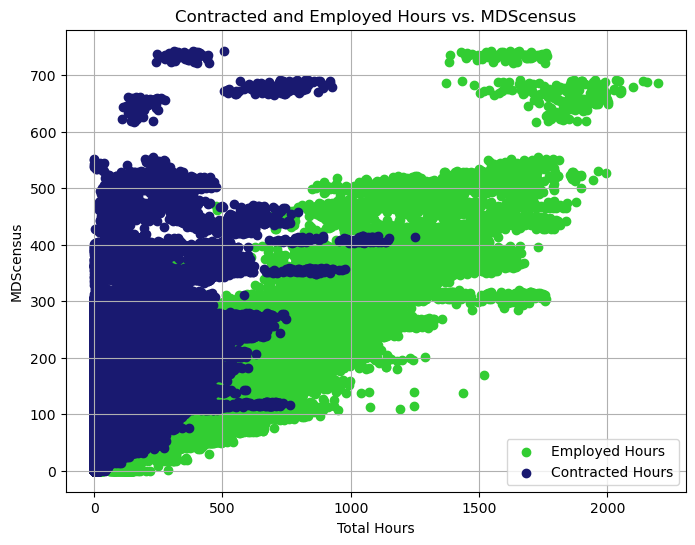

In [11]:
# Contracted and Employed Hours vs. MDScensus
df['Total_Employed_Hours'] = df['Hrs_RNDON'] + df['Hrs_CNA'] + df['Hrs_LPN'] + df['Hrs_NAtrn'] + df['Hrs_MedAide']
df['Total_Contracted_Hours'] = df['Hrs_RNadmin'] + df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr']


plt.figure(figsize=(8, 6))


plt.scatter(df['Total_Employed_Hours'], df['MDScensus'], color='limegreen', label='Employed Hours')


plt.scatter(df['Total_Contracted_Hours'], df['MDScensus'], color='midnightblue', label='Contracted Hours')


plt.xlabel('Total Hours')
plt.ylabel('MDScensus')

plt.title('Contracted and Employed Hours vs. MDScensus')

plt.legend()


plt.grid(True)
plt.show()

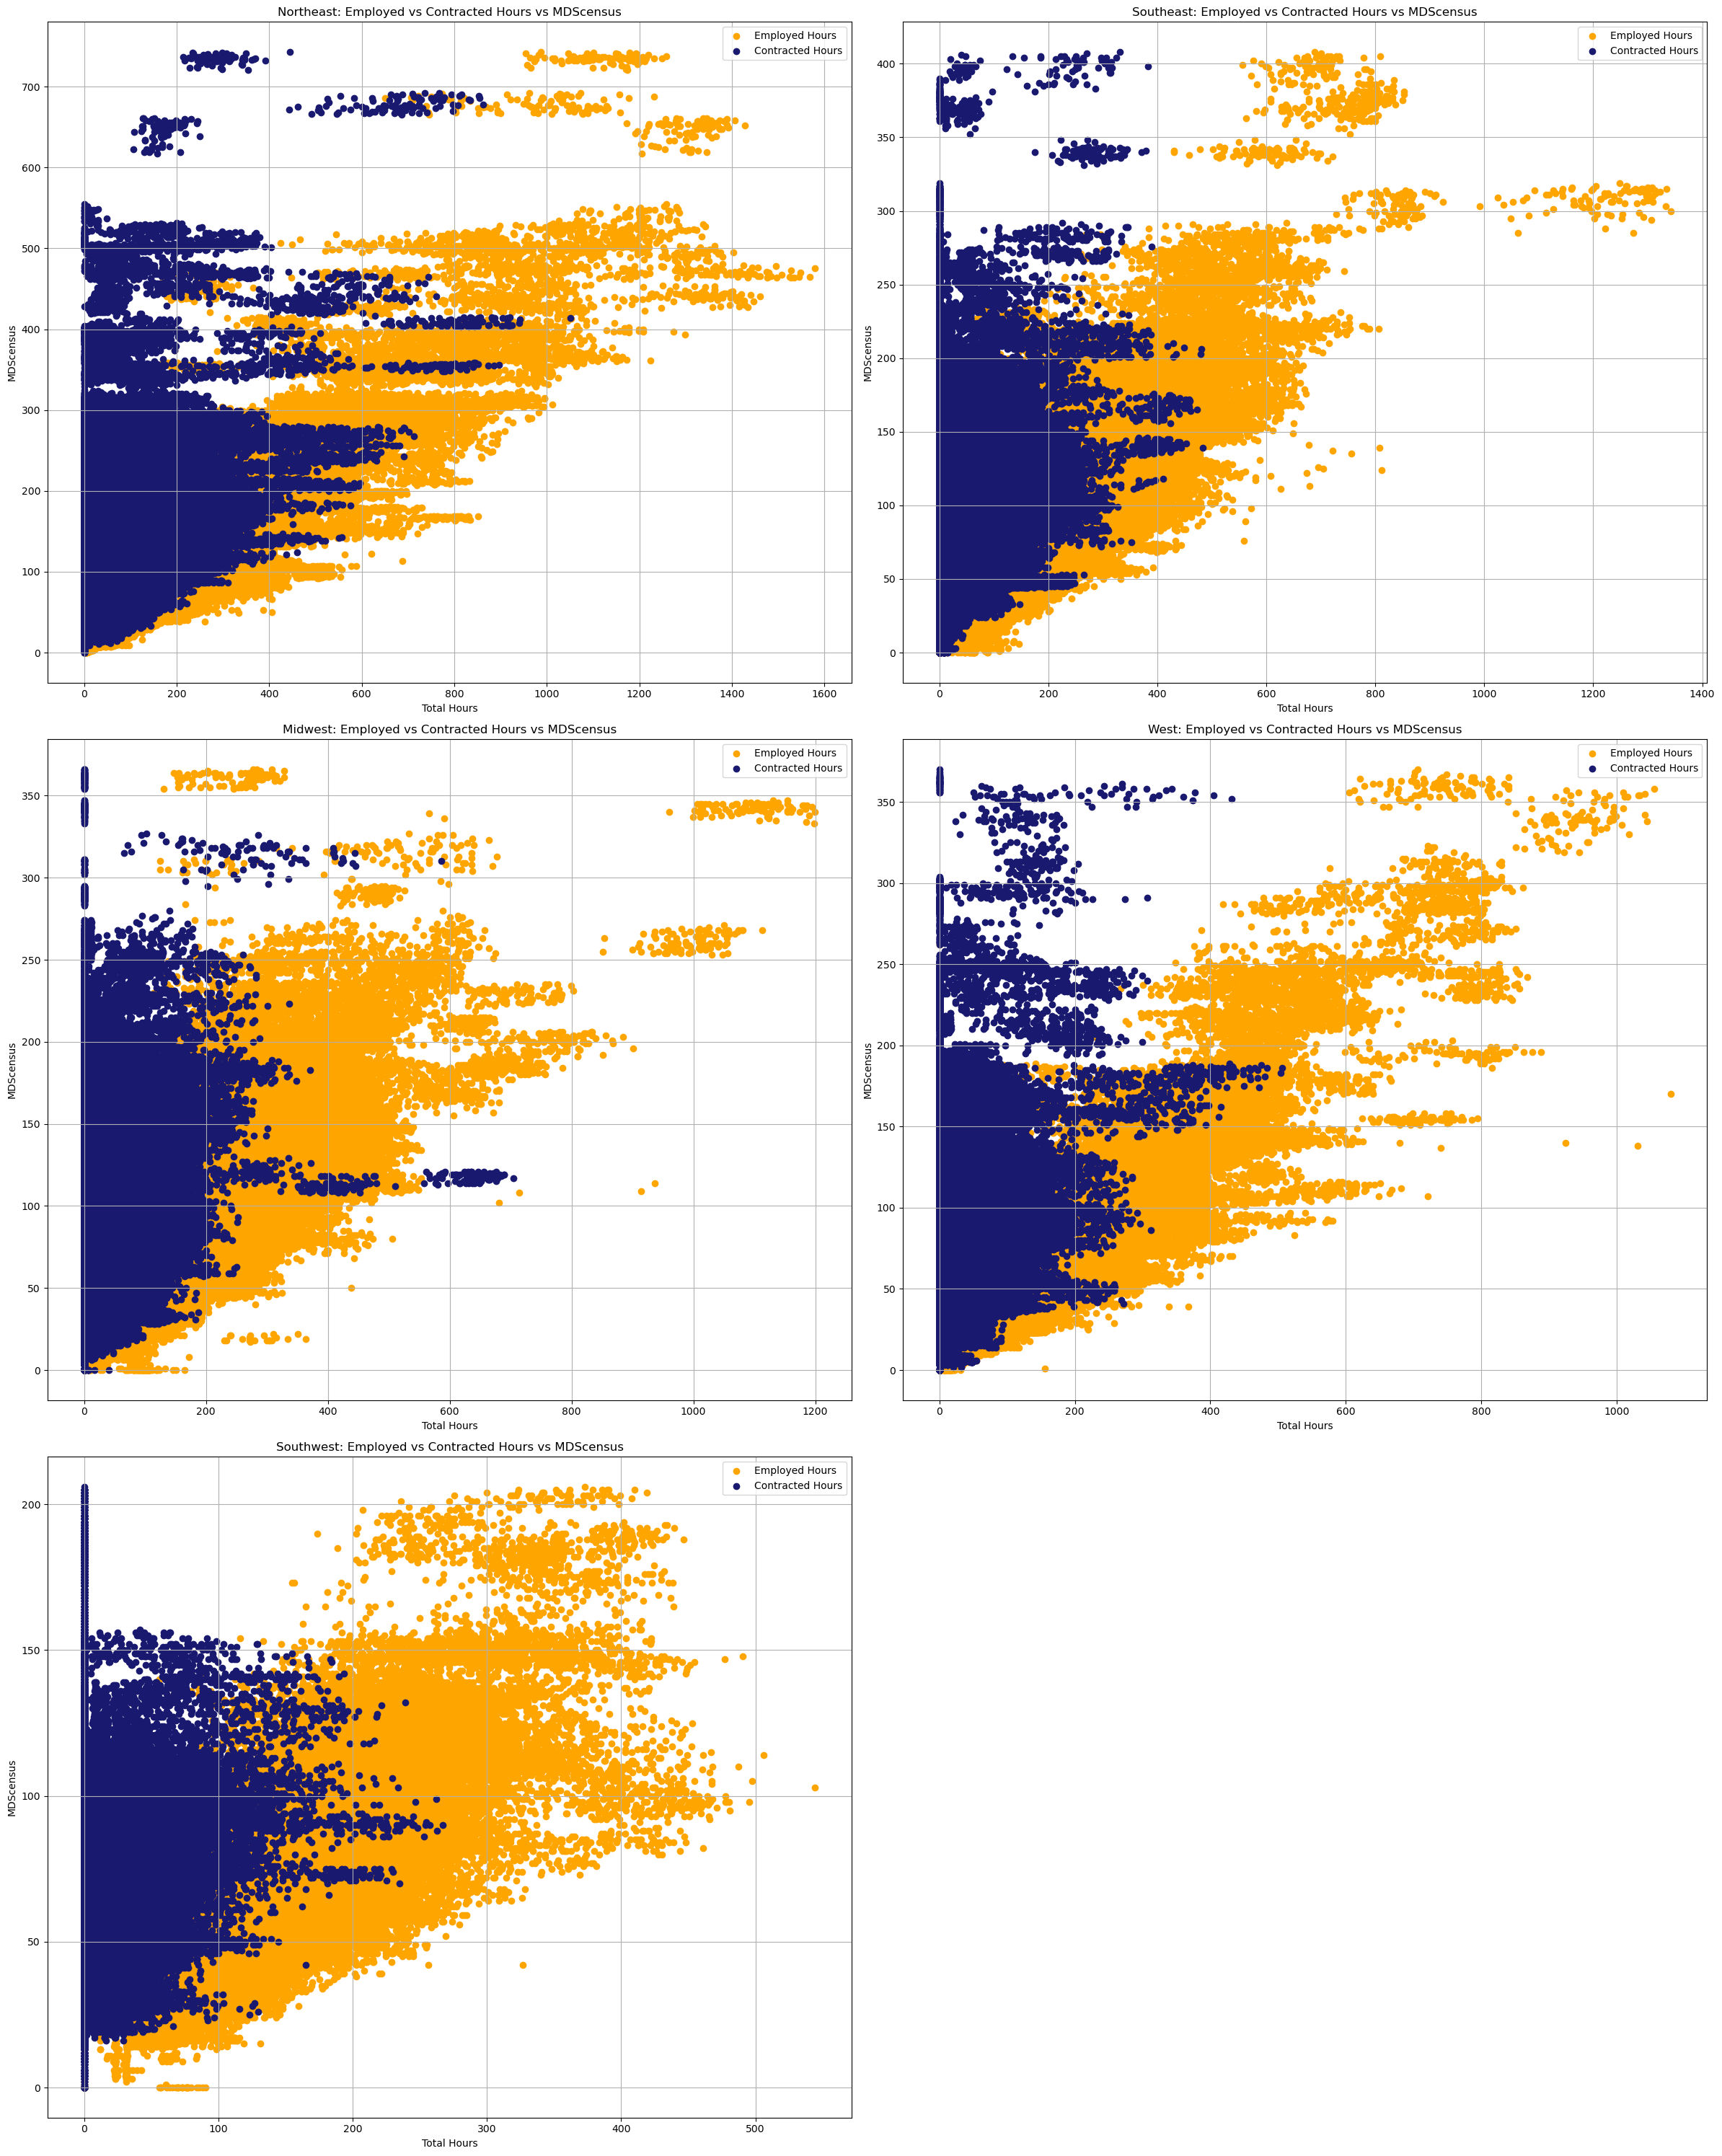

In [12]:
# Contracted and Employed Hours vs. MDScensus for each region

df_northeast['Total_Employed_Hours'] = (df_northeast['Hrs_RNDON'] + df_northeast['Hrs_CNA_emp'] + 
                                        df_northeast['Hrs_NAtrn_emp'] + df_northeast['Hrs_MedAide_emp'])
df_northeast['Total_Contracted_Hours'] = (df_northeast['Hrs_LPN_ctr'] + df_northeast['Hrs_CNA_ctr'] + 
                                          df_northeast['Hrs_NAtrn_ctr'] + df_northeast['Hrs_MedAide_ctr'])

df_southeast['Total_Employed_Hours'] = (df_southeast['Hrs_RNDON'] + df_southeast['Hrs_CNA_emp'] + 
                                        df_southeast['Hrs_NAtrn_emp'] + df_southeast['Hrs_MedAide_emp'])
df_southeast['Total_Contracted_Hours'] = (df_southeast['Hrs_LPN_ctr'] + df_southeast['Hrs_CNA_ctr'] + 
                                          df_southeast['Hrs_NAtrn_ctr'] + df_southeast['Hrs_MedAide_ctr'])

df_midwest['Total_Employed_Hours'] = (df_midwest['Hrs_RNDON'] + df_midwest['Hrs_CNA_emp'] + 
                                      df_midwest['Hrs_NAtrn_emp'] + df_midwest['Hrs_MedAide_emp'])
df_midwest['Total_Contracted_Hours'] = (df_midwest['Hrs_LPN_ctr'] + df_midwest['Hrs_CNA_ctr'] + 
                                        df_midwest['Hrs_NAtrn_ctr'] + df_midwest['Hrs_MedAide_ctr'])

df_west['Total_Employed_Hours'] = (df_west['Hrs_RNDON'] + df_west['Hrs_CNA_emp'] + 
                                   df_west['Hrs_NAtrn_emp'] + df_west['Hrs_MedAide_emp'])
df_west['Total_Contracted_Hours'] = (df_west['Hrs_LPN_ctr'] + df_west['Hrs_CNA_ctr'] + 
                                     df_west['Hrs_NAtrn_ctr'] + df_west['Hrs_MedAide_ctr'])

df_southwest['Total_Employed_Hours'] = (df_southwest['Hrs_RNDON'] + df_southwest['Hrs_CNA_emp'] + 
                                        df_southwest['Hrs_NAtrn_emp'] + df_southwest['Hrs_MedAide_emp'])
df_southwest['Total_Contracted_Hours'] = (df_southwest['Hrs_LPN_ctr'] + df_southwest['Hrs_CNA_ctr'] + 
                                          df_southwest['Hrs_NAtrn_ctr'] + df_southwest['Hrs_MedAide_ctr'])

fig, axs = plt.subplots(3, 2, figsize=(24, 30))

axs[0, 0].scatter(df_northeast['Total_Employed_Hours'], df_northeast['MDScensus'], color='orange', label='Employed Hours')
axs[0, 0].scatter(df_northeast['Total_Contracted_Hours'], df_northeast['MDScensus'], color='midnightblue', label='Contracted Hours')
axs[0, 0].set_title('Northeast: Employed vs Contracted Hours vs MDScensus')
axs[0, 0].set_xlabel('Total Hours')
axs[0, 0].set_ylabel('MDScensus')
axs[0, 0].legend()
axs[0, 0].grid(True)


axs[0, 1].scatter(df_southeast['Total_Employed_Hours'], df_southeast['MDScensus'], color='orange', label='Employed Hours')
axs[0, 1].scatter(df_southeast['Total_Contracted_Hours'], df_southeast['MDScensus'], color='midnightblue', label='Contracted Hours')
axs[0, 1].set_title('Southeast: Employed vs Contracted Hours vs MDScensus')
axs[0, 1].set_xlabel('Total Hours')
axs[0, 1].set_ylabel('MDScensus')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].scatter(df_midwest['Total_Employed_Hours'], df_midwest['MDScensus'], color='orange', label='Employed Hours')
axs[1, 0].scatter(df_midwest['Total_Contracted_Hours'], df_midwest['MDScensus'], color='midnightblue', label='Contracted Hours')
axs[1, 0].set_title('Midwest: Employed vs Contracted Hours vs MDScensus')
axs[1, 0].set_xlabel('Total Hours')
axs[1, 0].set_ylabel('MDScensus')
axs[1, 0].legend()
axs[1, 0].grid(True)


axs[1, 1].scatter(df_west['Total_Employed_Hours'], df_west['MDScensus'], color='orange', label='Employed Hours')
axs[1, 1].scatter(df_west['Total_Contracted_Hours'], df_west['MDScensus'], color='midnightblue', label='Contracted Hours')
axs[1, 1].set_title('West: Employed vs Contracted Hours vs MDScensus')
axs[1, 1].set_xlabel('Total Hours')
axs[1, 1].set_ylabel('MDScensus')
axs[1, 1].legend()
axs[1, 1].grid(True)


axs[2, 0].scatter(df_southwest['Total_Employed_Hours'], df_southwest['MDScensus'], color='orange', label='Employed Hours')
axs[2, 0].scatter(df_southwest['Total_Contracted_Hours'], df_southwest['MDScensus'], color='midnightblue', label='Contracted Hours')
axs[2, 0].set_title('Southwest: Employed vs Contracted Hours vs MDScensus')
axs[2, 0].set_xlabel('Total Hours')
axs[2, 0].set_ylabel('MDScensus')
axs[2, 0].legend()
axs[2, 0].grid(True)


axs[2, 1].axis('off')

plt.tight_layout()

plt.show()

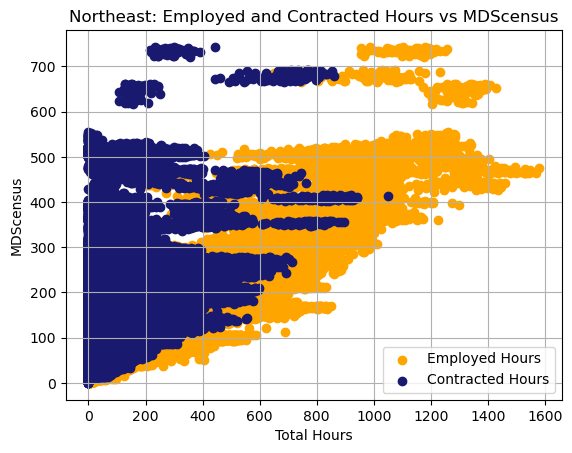

In [13]:
# Plot for Northeast
df_northeast['Total_Employed_Hours'] = (df_northeast['Hrs_RNDON'] + df_northeast['Hrs_CNA_emp'] + 
                                        df_northeast['Hrs_NAtrn_emp'] + df_northeast['Hrs_MedAide_emp'])
df_northeast['Total_Contracted_Hours'] = (df_northeast['Hrs_LPN_ctr'] + df_northeast['Hrs_CNA_ctr'] + 
                                          df_northeast['Hrs_NAtrn_ctr'] + df_northeast['Hrs_MedAide_ctr'])


plt.scatter(df_northeast['Total_Employed_Hours'], df_northeast['MDScensus'], color='orange', label='Employed Hours')
plt.scatter(df_northeast['Total_Contracted_Hours'], df_northeast['MDScensus'], color='midnightblue', label='Contracted Hours')
plt.title('Northeast: Employed and Contracted Hours vs MDScensus')
plt.xlabel('Total Hours')
plt.ylabel('MDScensus')
plt.legend()
plt.grid(True)
plt.show()

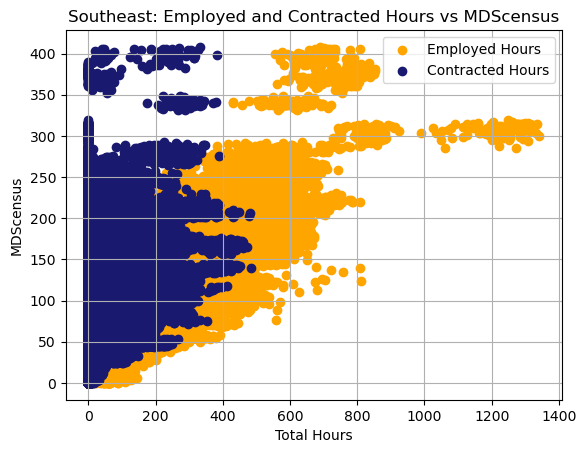

In [14]:
# Plot for Southeast
df_southeast['Total_Employed_Hours'] = (df_southeast['Hrs_RNDON'] + df_southeast['Hrs_CNA_emp'] + 
                                        df_southeast['Hrs_NAtrn_emp'] + df_southeast['Hrs_MedAide_emp'])
df_southeast['Total_Contracted_Hours'] = (df_southeast['Hrs_LPN_ctr'] + df_southeast['Hrs_CNA_ctr'] + 
                                          df_southeast['Hrs_NAtrn_ctr'] + df_southeast['Hrs_MedAide_ctr'])


plt.scatter(df_southeast['Total_Employed_Hours'], df_southeast['MDScensus'], color='orange', label='Employed Hours')
plt.scatter(df_southeast['Total_Contracted_Hours'], df_southeast['MDScensus'], color='midnightblue', label='Contracted Hours')
plt.title('Southeast: Employed and Contracted Hours vs MDScensus')
plt.xlabel('Total Hours')
plt.ylabel('MDScensus')
plt.legend()
plt.grid(True)
plt.show()

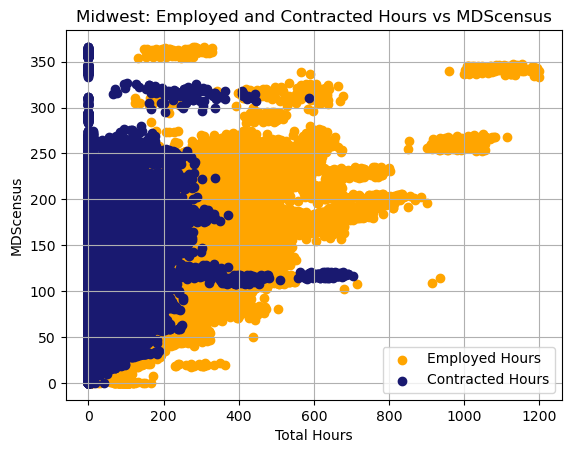

In [15]:
# Plot for Midwest
df_midwest['Total_Employed_Hours'] = (df_midwest['Hrs_RNDON'] + df_midwest['Hrs_CNA_emp'] + 
                                      df_midwest['Hrs_NAtrn_emp'] + df_midwest['Hrs_MedAide_emp'])
df_midwest['Total_Contracted_Hours'] = (df_midwest['Hrs_LPN_ctr'] + df_midwest['Hrs_CNA_ctr'] + 
                                        df_midwest['Hrs_NAtrn_ctr'] + df_midwest['Hrs_MedAide_ctr'])


plt.scatter(df_midwest['Total_Employed_Hours'], df_midwest['MDScensus'], color='orange', label='Employed Hours')
plt.scatter(df_midwest['Total_Contracted_Hours'], df_midwest['MDScensus'], color='midnightblue', label='Contracted Hours')
plt.title('Midwest: Employed and Contracted Hours vs MDScensus')
plt.xlabel('Total Hours')
plt.ylabel('MDScensus')
plt.legend()
plt.grid(True)
plt.show()

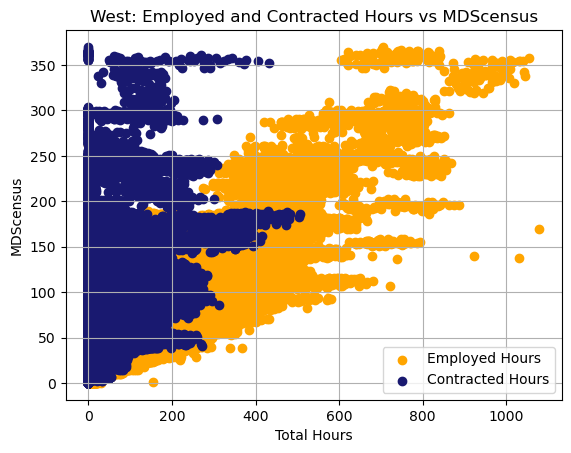

In [16]:
# Plot for West
df_west['Total_Employed_Hours'] = (df_west['Hrs_RNDON'] + df_west['Hrs_CNA_emp'] + 
                                   df_west['Hrs_NAtrn_emp'] + df_west['Hrs_MedAide_emp'])
df_west['Total_Contracted_Hours'] = (df_west['Hrs_LPN_ctr'] + df_west['Hrs_CNA_ctr'] + 
                                     df_west['Hrs_NAtrn_ctr'] + df_west['Hrs_MedAide_ctr'])


plt.scatter(df_west['Total_Employed_Hours'], df_west['MDScensus'], color='orange', label='Employed Hours')
plt.scatter(df_west['Total_Contracted_Hours'], df_west['MDScensus'], color='midnightblue', label='Contracted Hours')
plt.title('West: Employed and Contracted Hours vs MDScensus')
plt.xlabel('Total Hours')
plt.ylabel('MDScensus')
plt.legend()
plt.grid(True)
plt.show()

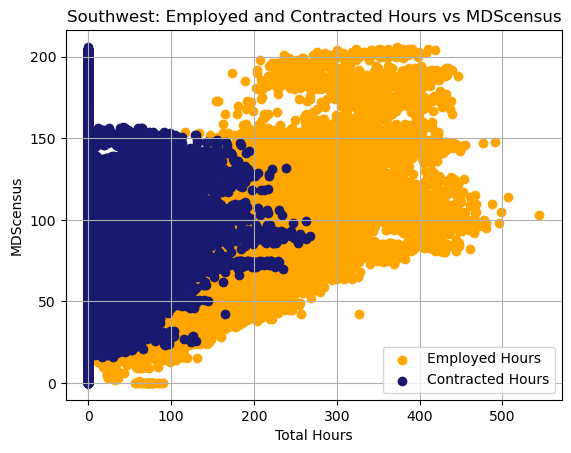

In [17]:
# Plot for Southwest
df_southwest['Total_Employed_Hours'] = (df_southwest['Hrs_RNDON'] + df_southwest['Hrs_CNA_emp'] + 
                                        df_southwest['Hrs_NAtrn_emp'] + df_southwest['Hrs_MedAide_emp'])
df_southwest['Total_Contracted_Hours'] = (df_southwest['Hrs_LPN_ctr'] + df_southwest['Hrs_CNA_ctr'] + 
                                          df_southwest['Hrs_NAtrn_ctr'] + df_southwest['Hrs_MedAide_ctr'])


plt.scatter(df_southwest['Total_Employed_Hours'], df_southwest['MDScensus'], color='orange', label='Employed Hours')
plt.scatter(df_southwest['Total_Contracted_Hours'], df_southwest['MDScensus'], color='midnightblue', label='Contracted Hours')
plt.title('Southwest: Employed and Contracted Hours vs MDScensus')
plt.xlabel('Total Hours')
plt.ylabel('MDScensus')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# computing total employed hours and total contracted hours by region
def calculate_hours_per_region(df, region_name):
    employed_hours = df['Hrs_RNDON'] + df['Hrs_CNA_emp'] + df['Hrs_NAtrn_emp'] + df['Hrs_MedAide_emp']
    contracted_hours = df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr']
    
    return {
        'Region': region_name,
        'Total_Employed_Hours': employed_hours.sum(),
        'Total_Contracted_Hours': contracted_hours.sum()
    }

regions = ['Northeast', 'Southeast', 'Midwest', 'West', 'Southwest']
dataframes = [df_northeast, df_southeast, df_midwest, df_west, df_southwest]


results = [calculate_hours_per_region(df, region) for df, region in zip(dataframes, regions)]

breakdown_df = pd.DataFrame(results)
breakdown_df

,Region,Total_Employed_Hours,Total_Contracted_Hours
0,Northeast,48591853.13,10295365.59
1,Southeast,66384782.06,5755955.09
2,Midwest,62466678.13,6054046.62
3,West,38050373.62,3040048.50
4,Southwest,18514751.14,1116401.87


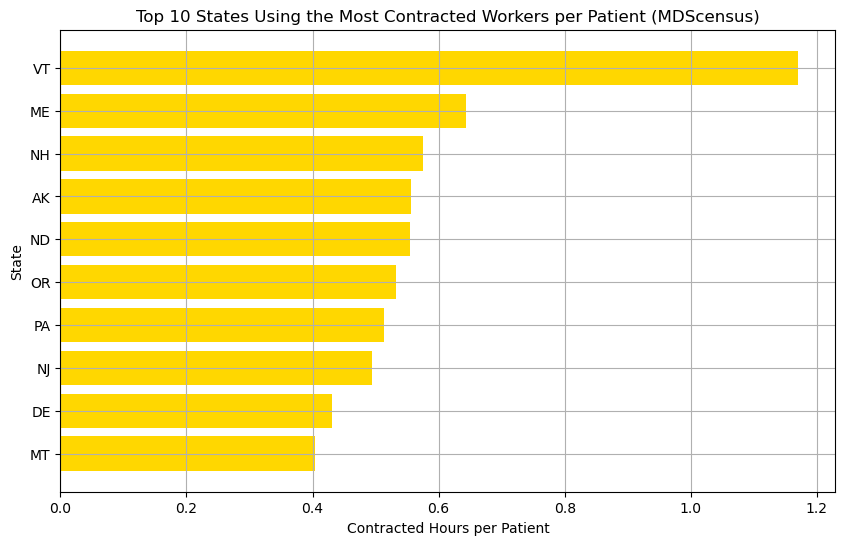

In [19]:
# top 10 states using the most contracted workers


df['Total_Contracted_Hours'] = (df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + 
                                df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr'])

state_grouped = df.groupby('STATE').agg({
    'Total_Contracted_Hours': 'sum',
    'MDScensus': 'sum'
}).reset_index()

state_grouped['Contracted_Hours_per_Patient'] = state_grouped['Total_Contracted_Hours'] / state_grouped['MDScensus']

state_sorted = state_grouped.sort_values(by='Contracted_Hours_per_Patient', ascending=False)


top_n = 10 
plt.figure(figsize=(10, 6))
plt.barh(state_sorted['STATE'].head(top_n), state_sorted['Contracted_Hours_per_Patient'].head(top_n), color='gold')
plt.xlabel('Contracted Hours per Patient')
plt.ylabel('State')
plt.title(f'Top {top_n} States Using the Most Contracted Workers per Patient (MDScensus)')
plt.gca().invert_yaxis()  
plt.grid(True)
plt.show()

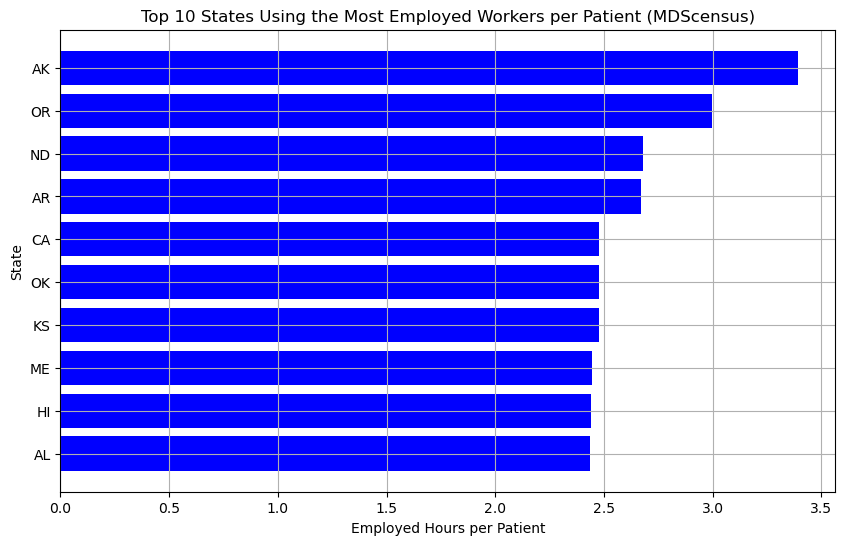

In [20]:
# Top 10 states with most employed workers per patient

df['Total_Employed_Hours'] = (df['Hrs_RNDON'] + df['Hrs_CNA_emp'] + 
                              df['Hrs_NAtrn_emp'] + df['Hrs_MedAide_emp'])

state_grouped_employed = df.groupby('STATE').agg({
    'Total_Employed_Hours': 'sum',
    'MDScensus': 'sum'
}).reset_index()

state_grouped_employed['Employed_Hours_per_Patient'] = state_grouped_employed['Total_Employed_Hours'] / state_grouped_employed['MDScensus']


state_sorted_employed = state_grouped_employed.sort_values(by='Employed_Hours_per_Patient', ascending=False)


top_n = 10  
plt.figure(figsize=(10, 6))
plt.barh(state_sorted_employed['STATE'].head(top_n), state_sorted_employed['Employed_Hours_per_Patient'].head(top_n), color='blue')
plt.xlabel('Employed Hours per Patient')
plt.ylabel('State')
plt.title(f'Top {top_n} States Using the Most Employed Workers per Patient (MDScensus)')
plt.gca().invert_yaxis()  
plt.grid(True)
plt.show()

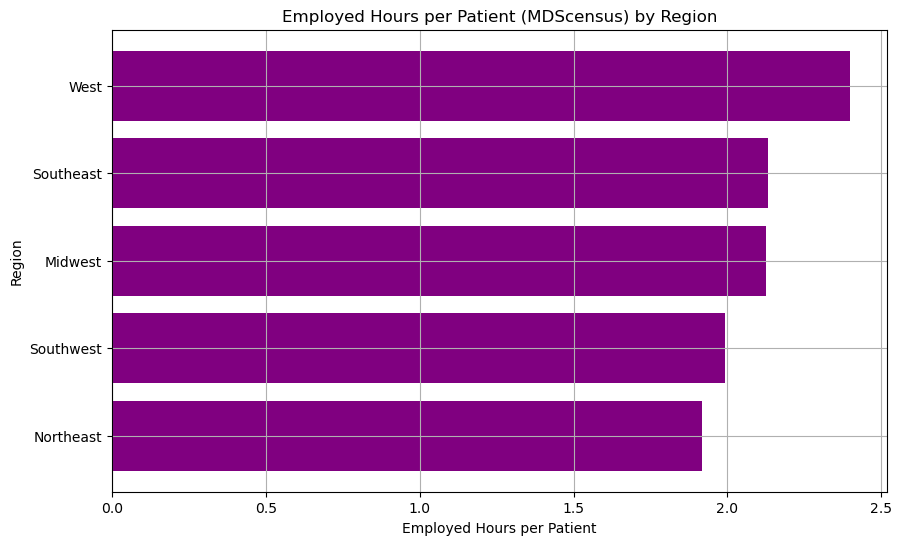

In [21]:
#Employed Hours per Patient (MDScensus) by Region
northeast_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']

southeast_states = ['DE', 'DC', 'MD', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL',
                     'AL', 'MS', 'AR', 'LA']

midwest_states = ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO',
                    'ND', 'SD', 'NE', 'KS']

west_states = ['CA', 'OR', 'WA', 'AK', 'HI', 'ID', 'NV', 'MT', 'WY', 'CO', 'UT',
                 'AZ', 'NM']

southwest_states = ['TX', 'OK']

df['Region'] = df['STATE'].apply(lambda x: 'Northeast' if x in northeast_states else
                                           'Southeast' if x in southeast_states else
                                           'Midwest' if x in midwest_states else
                                           'West' if x in west_states else
                                           'Southwest' if x in southwest_states else None)


df['Total_Employed_Hours'] = (df['Hrs_RNDON'] + df['Hrs_CNA_emp'] + df['Hrs_NAtrn_emp'] + df['Hrs_MedAide_emp'])

region_grouped_employed = df.groupby('Region').agg({
    'Total_Employed_Hours': 'sum',
    'MDScensus': 'sum'
}).reset_index()

region_grouped_employed['Employed_Hours_per_Patient'] = region_grouped_employed['Total_Employed_Hours'] / region_grouped_employed['MDScensus']

region_sorted_employed = region_grouped_employed.sort_values(by='Employed_Hours_per_Patient', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(region_sorted_employed['Region'], region_sorted_employed['Employed_Hours_per_Patient'], color='purple')
plt.xlabel('Employed Hours per Patient')
plt.ylabel('Region')
plt.title('Employed Hours per Patient (MDScensus) by Region')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

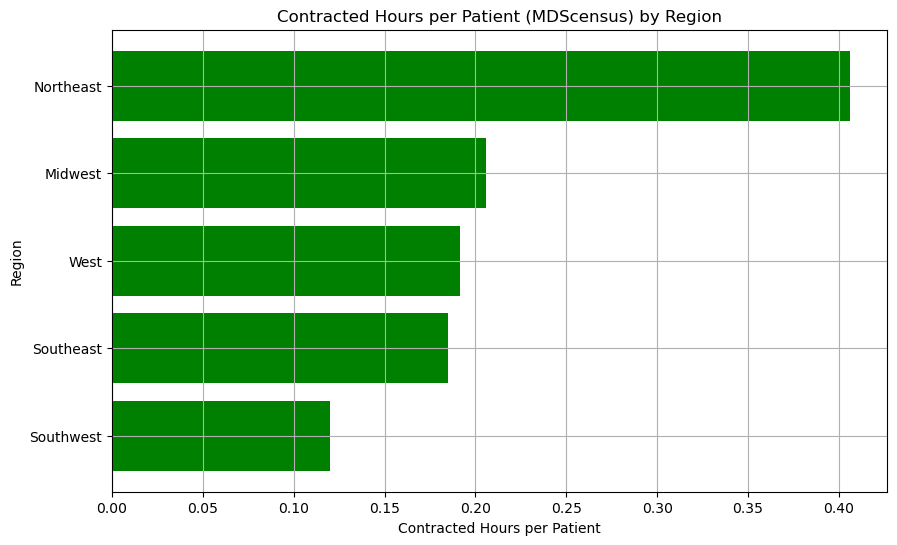

In [22]:
#Contracted Hours per Patient (MDScensus) by Region


northeast_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']

southeast_states = ['DE', 'DC', 'MD', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL',
                     'AL', 'MS', 'AR', 'LA']

midwest_states = ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO',
                    'ND', 'SD', 'NE', 'KS']

west_states = ['CA', 'OR', 'WA', 'AK', 'HI', 'ID', 'NV', 'MT', 'WY', 'CO', 'UT',
                 'AZ', 'NM']

southwest_states = ['TX', 'OK']


df['Region'] = df['STATE'].apply(lambda x: 'Northeast' if x in northeast_states else
                                           'Southeast' if x in southeast_states else
                                           'Midwest' if x in midwest_states else
                                           'West' if x in west_states else
                                           'Southwest' if x in southwest_states else None)


df['Total_Contracted_Hours'] = (df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + 
                                df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr'])


region_grouped_contracted = df.groupby('Region').agg({
    'Total_Contracted_Hours': 'sum',
    'MDScensus': 'sum'
}).reset_index()


region_grouped_contracted['Contracted_Hours_per_Patient'] = region_grouped_contracted['Total_Contracted_Hours'] / region_grouped_contracted['MDScensus']


region_sorted_contracted = region_grouped_contracted.sort_values(by='Contracted_Hours_per_Patient', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(region_sorted_contracted['Region'], region_sorted_contracted['Contracted_Hours_per_Patient'], color='green')
plt.xlabel('Contracted Hours per Patient')
plt.ylabel('Region')
plt.title('Contracted Hours per Patient (MDScensus) by Region')
plt.gca().invert_yaxis()  
plt.grid(True)
plt.show()

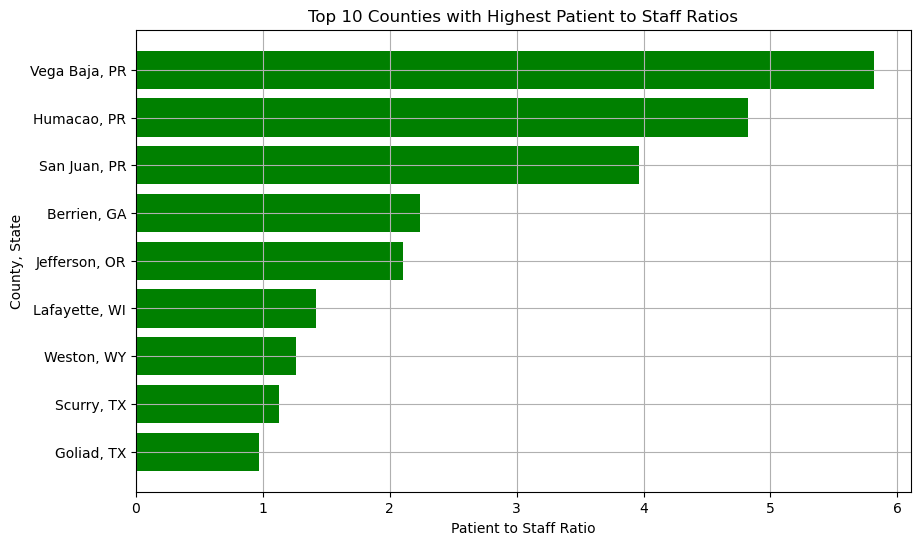

In [23]:
# Top 10 Counties with Highest Patient to Staff Ratios
df['Total_Employed_Hours'] = (df['Hrs_RNDON'] + df['Hrs_CNA_emp'] + 
                              df['Hrs_NAtrn_emp'] + df['Hrs_MedAide_emp'])

df['Total_Contracted_Hours'] = (df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + 
                                df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr'])


df['Total_Staff_Hours'] = df['Total_Employed_Hours'] + df['Total_Contracted_Hours']

county_state_grouped = df.groupby(['COUNTY_NAME', 'STATE']).agg({
    'Total_Staff_Hours': 'sum',
    'MDScensus': 'sum'
}).reset_index()


county_state_grouped['Patient_to_Staff_Ratio'] = county_state_grouped['MDScensus'] / county_state_grouped['Total_Staff_Hours']


top_10_counties = county_state_grouped.sort_values(by='Patient_to_Staff_Ratio', ascending=False).head(10)


top_10_counties['County_State'] = top_10_counties['COUNTY_NAME'] + ', ' + top_10_counties['STATE']


plt.figure(figsize=(10, 6))
plt.barh(top_10_counties['County_State'], top_10_counties['Patient_to_Staff_Ratio'], color='green')
plt.xlabel('Patient to Staff Ratio')
plt.ylabel('County, State')
plt.title('Top 10 Counties with Highest Patient to Staff Ratios')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

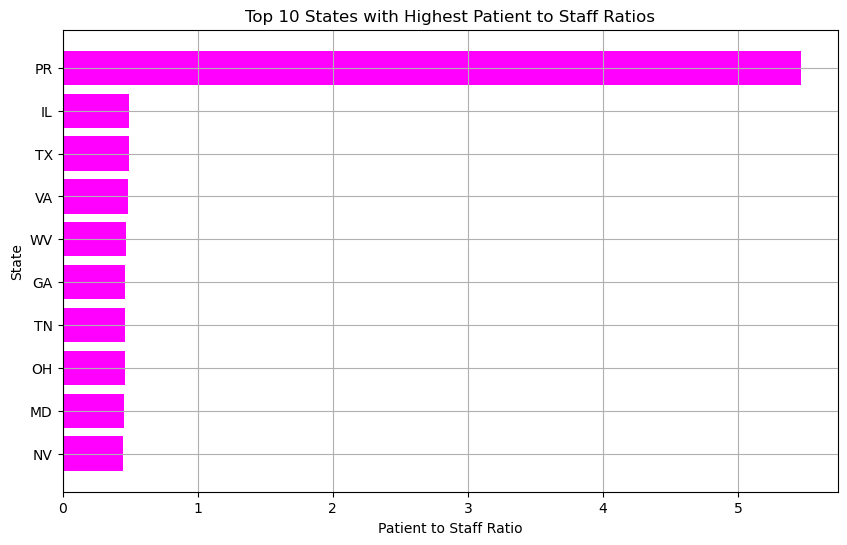

In [24]:
# Top 10 States with Highest Patient to Staff Ratios

df['Total_Employed_Hours'] = (df['Hrs_RNDON'] + df['Hrs_CNA_emp'] + 
                              df['Hrs_NAtrn_emp'] + df['Hrs_MedAide_emp'])

df['Total_Contracted_Hours'] = (df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + 
                                df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr'])

df['Total_Staff_Hours'] = df['Total_Employed_Hours'] + df['Total_Contracted_Hours']

state_grouped = df.groupby('STATE').agg({
    'Total_Staff_Hours': 'sum',
    'MDScensus': 'sum'
}).reset_index()


state_grouped['Patient_to_Staff_Ratio'] = state_grouped['MDScensus'] / state_grouped['Total_Staff_Hours']


top_10_states = state_grouped.sort_values(by='Patient_to_Staff_Ratio', ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_10_states['STATE'], top_10_states['Patient_to_Staff_Ratio'], color='magenta')
plt.xlabel('Patient to Staff Ratio')
plt.ylabel('State')
plt.title('Top 10 States with Highest Patient to Staff Ratios')
plt.gca().invert_yaxis()  
plt.grid(True)
plt.show()

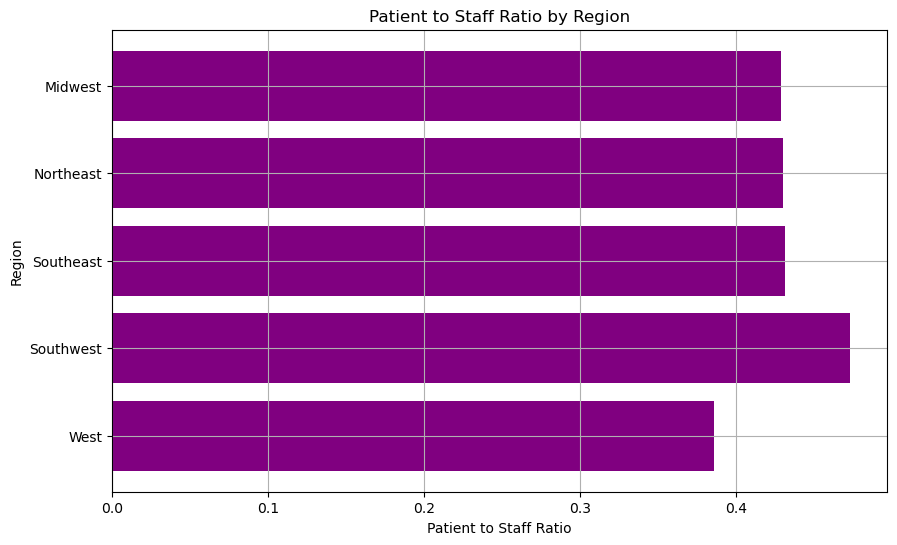

In [25]:
#Patient to staff ratio by region

northeast_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']

southeast_states = ['DE', 'DC', 'MD', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL',
                     'AL', 'MS', 'AR', 'LA']

midwest_states = ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO',
                    'ND', 'SD', 'NE', 'KS']

west_states = ['CA', 'OR', 'WA', 'AK', 'HI', 'ID', 'NV', 'MT', 'WY', 'CO', 'UT',
                 'AZ', 'NM']

southwest_states = ['TX', 'OK']


df['Region'] = df['STATE'].apply(lambda x: 'Northeast' if x in northeast_states else
                                           'Southeast' if x in southeast_states else
                                           'Midwest' if x in midwest_states else
                                           'West' if x in west_states else
                                           'Southwest' if x in southwest_states else None)


df['Total_Employed_Hours'] = (df['Hrs_RNDON'] + df['Hrs_CNA_emp'] + 
                              df['Hrs_NAtrn_emp'] + df['Hrs_MedAide_emp'])

df['Total_Contracted_Hours'] = (df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + 
                                df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr'])

df['Total_Staff_Hours'] = df['Total_Employed_Hours'] + df['Total_Contracted_Hours']

region_grouped = df.groupby('Region').agg({
    'Total_Staff_Hours': 'sum',
    'MDScensus': 'sum'
}).reset_index()


region_grouped['Patient_to_Staff_Ratio'] = region_grouped['MDScensus'] / region_grouped['Total_Staff_Hours']


plt.figure(figsize=(10, 6))
plt.barh(region_grouped['Region'], region_grouped['Patient_to_Staff_Ratio'], color='purple')
plt.xlabel('Patient to Staff Ratio')
plt.ylabel('Region')
plt.title('Patient to Staff Ratio by Region')
plt.gca().invert_yaxis()  
plt.grid(True)
plt.show()

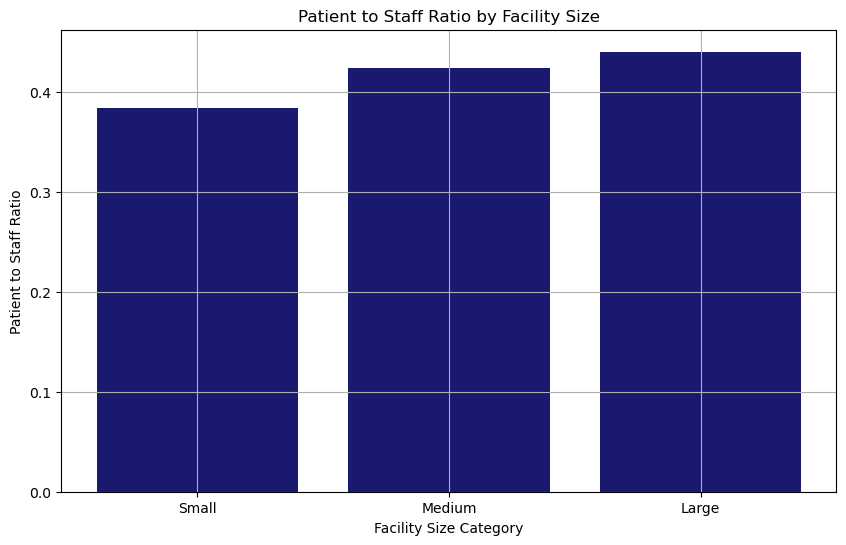

In [26]:
#Patient to staff ratio by facility size

conditions = [
    (df['MDScensus'] < 50),
    (df['MDScensus'] >= 50) & (df['MDScensus'] <= 100),
    (df['MDScensus'] > 100)
]
choices = ['Small', 'Medium', 'Large']
df['Facility_Category'] = pd.cut(df['MDScensus'], bins=[0, 50, 100, float('inf')], labels=choices)


df['Total_Employed_Hours'] = df['Hrs_RNDON'] + df['Hrs_CNA_emp'] + df['Hrs_NAtrn_emp'] + df['Hrs_MedAide_emp']
df['Total_Contracted_Hours'] = df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr']
df['Total_Staff_Hours'] = df['Total_Employed_Hours'] + df['Total_Contracted_Hours']


facility_grouped = df.groupby('Facility_Category').agg({
    'Total_Staff_Hours': 'sum',
    'MDScensus': 'sum'
}).reset_index()


facility_grouped['Patient_to_Staff_Ratio'] = facility_grouped['MDScensus'] / facility_grouped['Total_Staff_Hours']


plt.figure(figsize=(10, 6))
plt.bar(facility_grouped['Facility_Category'], facility_grouped['Patient_to_Staff_Ratio'], color='midnightblue')
plt.xlabel('Facility Size Category')
plt.ylabel('Patient to Staff Ratio')
plt.title('Patient to Staff Ratio by Facility Size')
plt.grid(True)
plt.show()

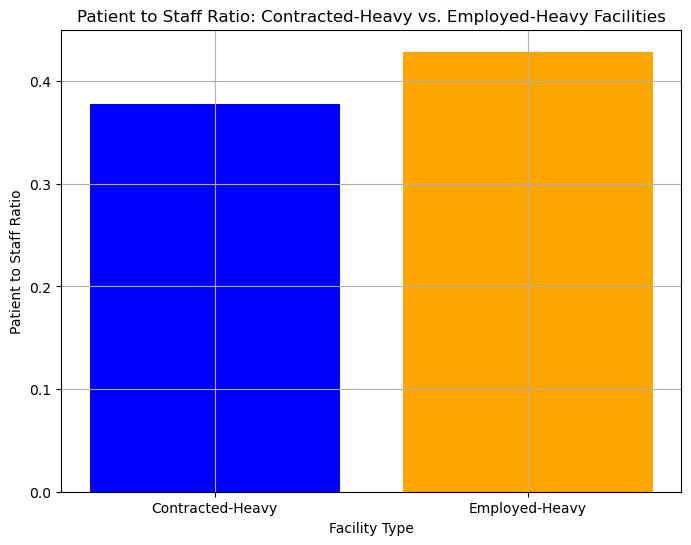

In [27]:
#Patient to staff ratio contracted vs employee

df['Total_Employed_Hours'] = df['Hrs_RNDON'] + df['Hrs_CNA_emp'] + df['Hrs_NAtrn_emp'] + df['Hrs_MedAide_emp']
df['Total_Contracted_Hours'] = df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr']
df['Total_Staff_Hours'] = df['Total_Employed_Hours'] + df['Total_Contracted_Hours']

df['Facility_Type'] = df.apply(lambda row: 'Contracted-Heavy' if row['Total_Contracted_Hours'] > row['Total_Employed_Hours'] 
                               else 'Employed-Heavy', axis=1)

facility_grouped = df.groupby('Facility_Type').agg({
    'Total_Staff_Hours': 'sum',
    'MDScensus': 'sum'
}).reset_index()

facility_grouped['Patient_to_Staff_Ratio'] = facility_grouped['MDScensus'] / facility_grouped['Total_Staff_Hours']

plt.figure(figsize=(8, 6))
plt.bar(facility_grouped['Facility_Type'], facility_grouped['Patient_to_Staff_Ratio'], color=['blue', 'orange'])
plt.xlabel('Facility Type')
plt.ylabel('Patient to Staff Ratio')
plt.title('Patient to Staff Ratio: Contracted-Heavy vs. Employed-Heavy Facilities')
plt.grid(True)
plt.show()

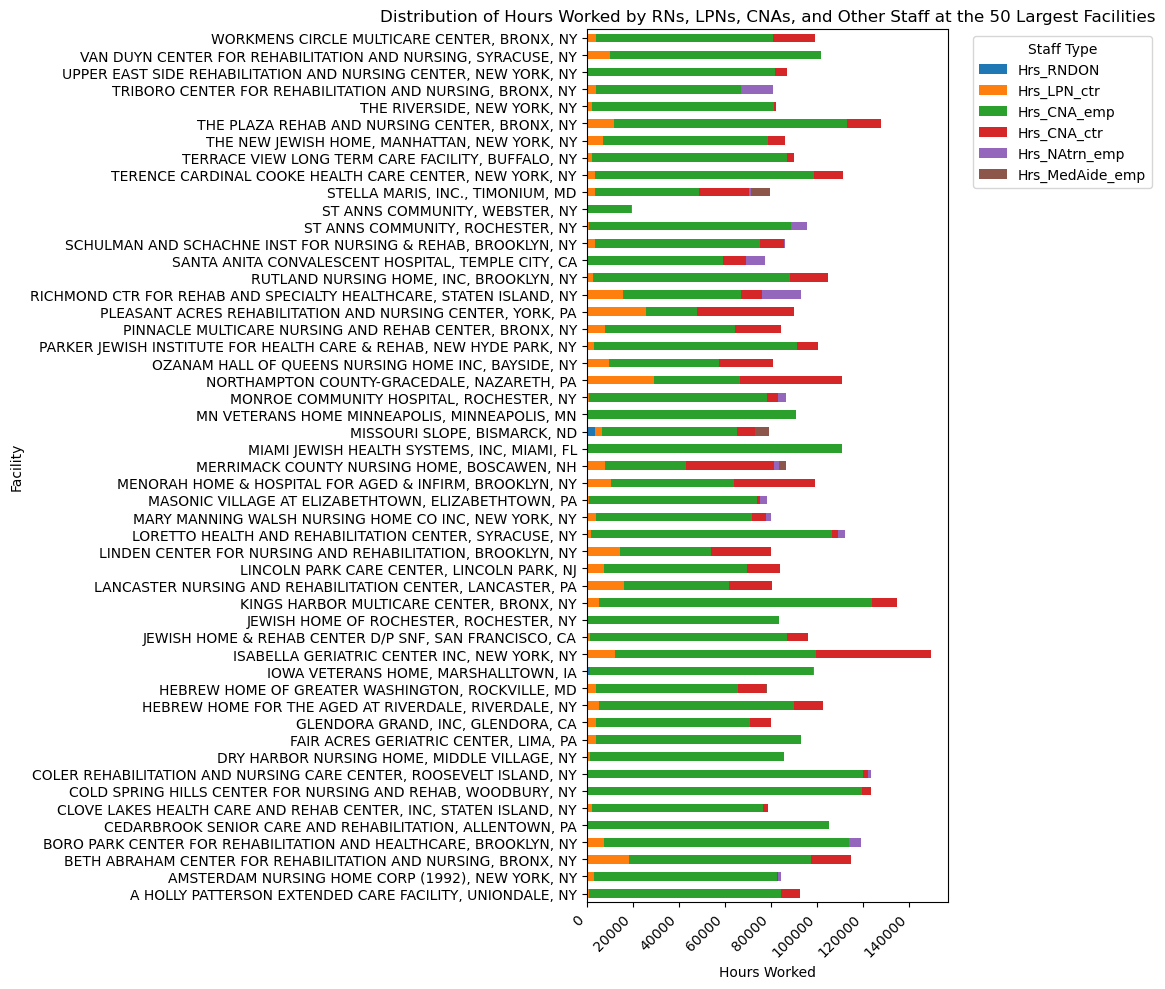

In [28]:
# Distribution of Hours Worked by RNs, LPNs, CNAs, and Other Staff at the 50 Largest Facilities
df['Total_Staff_Hours'] = df['Hrs_RNDON'] + df['Hrs_LPN_ctr'] + df['Hrs_CNA_emp'] + df['Hrs_CNA_ctr'] + df['Hrs_NAtrn_emp'] + df['Hrs_MedAide_emp']


facility_size_by_hours = df.groupby(['PROVNAME', 'CITY', 'STATE'])['Total_Staff_Hours'].sum().reset_index()
top_50_facilities = facility_size_by_hours.sort_values(by='Total_Staff_Hours', ascending=False).head(50)


top_50_facilities_list = top_50_facilities['PROVNAME'].tolist()
df_top_50 = df[df['PROVNAME'].isin(top_50_facilities_list)]

facility_hours_top_50 = df_top_50.groupby(['PROVNAME', 'CITY', 'STATE']).agg({
    'Hrs_RNDON': 'sum',    
    'Hrs_LPN_ctr': 'sum',  
    'Hrs_CNA_emp': 'sum',  
    'Hrs_CNA_ctr': 'sum',  
    'Hrs_NAtrn_emp': 'sum', 
    'Hrs_MedAide_emp': 'sum'  
}).reset_index()


facility_hours_top_50['Facility'] = facility_hours_top_50['PROVNAME'] + ', ' + facility_hours_top_50['CITY'] + ', ' + facility_hours_top_50['STATE']


facility_hours_top_50.set_index('Facility', inplace=True)


ax = facility_hours_top_50[['Hrs_RNDON', 'Hrs_LPN_ctr', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn_emp', 'Hrs_MedAide_emp']].plot(kind='barh', stacked=True, figsize=(12, 10))


plt.xticks(rotation=45, ha='right')


plt.title('Distribution of Hours Worked by RNs, LPNs, CNAs, and Other Staff at the 50 Largest Facilities')
plt.xlabel('Hours Worked')
plt.ylabel('Facility')
plt.legend(title='Staff Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

While the analysis could go further, depending on the direction of the organization, here are 5 strong recommendations based on the Payroll Based Journal (PBJ) Daily Nurse Staffing dataset

1.      Invest in advanced Nurse Training and Development Programs
Encourage continuous education and specialized certifications for nurses to enhance their skills in critical areas such as geriatric care, oncology, and telemedicine. Given the growing demand for specialized healthcare services, the investment in professional training and development will ensure a highly skilled workforce.  

2.      Leverage Technology for Staffing Optimization
Utilizing predictive analytics, machine learning, and workforce management tools can help to better allocate nursing staff according to demand. This will ensure patient care needs are met efficiently, reduce over-reliance on contracted staff, and prevent burnout among full-time employees.

3.      Prioritize the Well-being and Mental Health of Nursing Staff
Implement mental health programs, including counseling and support groups, specifically designed for nurses. Telehealth options may also help in this realm as well. This can improve retention rates and prevent burnout, which is a common issue among Nursing staff.

4.      Expand Telemedicine Nursing Roles
Encourage nurses to become skilled at providing remote patient care. This will not only broaden the scope of nursing roles but also allow healthcare companies to reach more patients, especially in rural areas, where access to healthcare may be limited.

5.      Promote Leadership Opportunities for Nurses
Foster leadership development programs for nurses to assume managerial or policy-making roles within the organization. This can help keep employed nurses for longer, improve decision-making at the operational level, and enhance organizational culture by involving those with direct patient care experience in leadership decisions.



